<a href="https://colab.research.google.com/github/Sparadrap1101/CryptoFinance/blob/main/SelfishMiningAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# Author: Alexis Cerio
#
# Subject: We want to simulate a Silfish Mining Attack strategy against an honest mining strategy in order to determine which one is the most profitable.
# 
#
# Attack Process: The attacker will first premine X block ahead of the main chain before starting his attack. If the attacker is behind the main chain 
# during the premining phase, he will abandon his blocks and restart mining from the last block of the main chain. (X = premineBlocks)
#
# Once the premining phase is over, the attacker will launch his attack. This will end either if the attacker is Y blocks behind the main chain, 
# or if he is ahead of the main chain at least Z blocks after the start of his attack. (Y = maxTolerance, Z = requireConfirmation)
#
# X, Y, and Z are to be defined depending on the simulations you want to perform.

import random

# We define the variables necessary for the simulation.
totalHashrate = 100
coinbaseRevenu = 6.25
allAttackerHashrate = list(range(0, 100))
finalCoefficient = []
finalHonestCoefficient = []
thresholdBestStrat = 0

premineBlocks = int(input("How many blocks should the attacker premine before launching the attack? (e.g. 3) > "))
maxTolerance = int(input("What's the maximum number of blocks behind the main chain the attacker tolerates before stopping his attack? (e.g. 3) > "))
requireConfirmations = int(input("Number of confirmations the merchant waits to validate a transaction? (e.g. 6) > "))
nbreCycle = int(input("Number of attack cycles? (e.g. 500) > "))
GainDoubleSpending = int(input("What's the amount of the double spend? (e.g. 10) > "))

How many blocks should the attacker premine before launching the attack? (e.g. 3) > 3
What's the maximum number of blocks behind the main chain the attacker tolerates before stopping his attack? (e.g. 3) > 3
Number of confirmations the merchant waits to validate a transaction? (e.g. 6) > 6
Number of attack cycles? (e.g. 500) > 500
What's the amount of the double spend? (e.g. 10) > 10


In [26]:
print("Waiting for compute...")

# We start simulation here.
# First we do a for loop to simulate with all different attacker hashrate % possible.
for attackerHashrate in allAttackerHashrate:
  # We create and reset the time, the honest miner revenue and the attacker revenue values for each simulation.
  honestRevenu = 0
  finalRevenu = 0
  time = 0

  # We launch the simulation and calculate the time and yield of the strategy over X cycles defined earlier.
  for i in range(nbreCycle):
    # We reset the number of blocks ahead of the main chain and the number of blocks mined by the attacker at each new cycle.
    blockAdvance = 0
    attackerBlockNbre = 0

    # We create a variable exit which will simply allow us to save calculation time and not get stuck too long on premining in our simulations
    # when the attacker has very little hashrate.
    exit = 0
    exitRatio = 500 if attackerHashrate > 15 else 50


    ## Premining Phase ##

    # The premining phase ends when the attacker has premined X blocks ahead of the main chain (or if it takes too long to premine and we exit 
    # to optimize calculation time).
    while blockAdvance < premineBlocks and exit < exitRatio:
      exit += 1
      
      blockMined = random.randrange(0, totalHashrate) # A new block is mined.
      honestRevenu += (attackerHashrate / totalHashrate) * coinbaseRevenu # We increment the yield of the honest miner based on its % of the total hashrate.

      if (blockMined <= attackerHashrate): # If it's the attacker who mines the new block:
        # We increase the total mining time, his advance on the main chain, and his total number of mined blocks.
        blockAdvance += 1
        attackerBlockNbre += 1
        time += 10
      else: 
        if blockAdvance == 0: # If it's not the attacker who mines the new block and he has no advance on the main chain:
          # We increase the total mining time and the attacker restarts mining from the main chain so we reset his total number of mined blocks.
          attackerBlockNbre = 0
          time += 10
        else: # If he still has an advance on the main chain, we only decrease his advance and increase the total mining time.
          blockAdvance -= 1
          time += 10


    ## Attack Phase ##

    # The attack phase begins once the premining phase is over. This phase ends if the attacker is Y blocks behind the main chain, or if the attacker
    # is ahead of the main chain at least Z blocks after the start of the attack.
    while exit < exitRatio and blockAdvance >= 0 - maxTolerance and (attackerBlockNbre < requireConfirmations or (attackerBlockNbre >= requireConfirmations and blockAdvance <= 0)):
      blockMined = random.randrange(0, totalHashrate) # A new block is mined.
      honestRevenu += (attackerHashrate / totalHashrate) * coinbaseRevenu # We increment the yield of the honest miner based on its % of the total hashrate.

      if (blockMined <= attackerHashrate): # If it's the attacker who mines the new block:
        # We increase the total mining time, his advance on the main chain, and his total number of mined blocks.
        blockAdvance += 1
        attackerBlockNbre += 1
        time += 10
      else: # If it's not the attacker who mines the new block, we decrease his advance of blocks on the main chain and increase the total mining time.
        blockAdvance -= 1
        time += 10

    # Once the attack is over, we calculate the attacker's revenue before launching a new cycle.
    if (blockAdvance < 0 or exit >= exitRatio): # If the attacker wasn't successful in his attack, he will then have zero revenue.
      finalRevenu += 0
    else: # If the attacker was successful in his attack, his revenue will be that of all the blocks he mined + the amount of the double spend made in his attack.
      finalRevenu += attackerBlockNbre * coinbaseRevenu + GainDoubleSpending

  # Once all cycles are completed for a given hashrate value, we save the yield coefficient of the attacker and the honest miner in order to verify
  # and display the most profitable strategy to implement based on the hashrate.
  finalCoefficient.append(finalRevenu / time)
  finalHonestCoefficient.append(honestRevenu / time)

  # We then determine the attacker's hashrate % threshold at which the Selfish Mining attack is the most profitable one.
  thresholdBestStrat = attackerHashrate if max(finalRevenu, honestRevenu) == honestRevenu else thresholdBestStrat

print("Finalized!")

Waiting for compute...
Finalized!


We can see that the threshold from which the Selfish Mining strategy is the best one is when the attacker have at least 54% of the total hashrate.


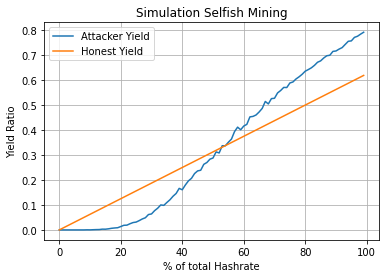

In [27]:
import matplotlib.pyplot as plt
import numpy as np

print("We can see that the threshold from which the Selfish Mining strategy is the best one is when the attacker have at least " + str(thresholdBestStrat) + "% of the total hashrate.")

# We simply end by displaying the yield ratio curves of our simulation in order to see which strategie is the best based on the hashrate.
plt.plot(allAttackerHashrate, finalCoefficient, label="Attacker Yield")
plt.plot(allAttackerHashrate, finalHonestCoefficient, label="Honest Yield")
plt.legend(loc='upper left')
plt.xlabel('% of total Hashrate')
plt.ylabel('Yield Ratio')
plt.title("Simulation Selfish Mining")
plt.grid()
plt.show()